code

<!-- https://github.com/joshivaibhav/AmazonCustomerReview -->

In [1]:
!wget https://raw.githubusercontent.com/joshivaibhav/AmazonCustomerReview/master/amazondata.csv

--2025-03-22 06:00:50--  https://raw.githubusercontent.com/joshivaibhav/AmazonCustomerReview/master/amazondata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76859124 (73M) [text/plain]
Saving to: ‘amazondata.csv.1’

amazondata.csv.1    100%[===================>]  73.30M  59.0MB/s    in 1.2s    

2025-03-22 06:00:52 (59.0 MB/s) - ‘amazondata.csv.1’ saved [76859124/76859124]



In [2]:
!pip install gensim

In [3]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using 

In [4]:
!pip install --upgrade pandas

In [5]:
#General Imports
import numpy as np
import pandas as pd
import pickle
from os.path import join


#Preprocessing related imports
from nltk.stem import WordNetLemmatizer
import gensim.parsing.preprocessing as gpp
import gensim.utils as gu

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
# import tensorflow_hub as hub
# import tensorflow as tf
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
# import tensorflow_hub as hub
# import tensorflow_text as text
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

import string
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import tensorflow as tf
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
# import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
df_train=pd.read_csv("/content/amazondata.csv",engine=None, delimiter=None)

<ipython-input-7-e32e5369b899>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train=pd.read_csv("/content/amazondata.csv",engine=None, delimiter=None)


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128845 entries, 0 to 128844
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Helpful Votes (bin)  114947 non-null  object 
 1   Number of Records    128843 non-null  object 
 2   Star Rating (bin)    116311 non-null  object 
 3   Customer Id          59980 non-null   float64
 4   Helpful Votes        114943 non-null  float64
 5   Overall Votes        116121 non-null  float64
 6   Product Id           128840 non-null  object 
 7   Review Body          128831 non-null  object 
 8   Review Year          114933 non-null  object 
 9   Review Headline      128827 non-null  object 
 10  Star Rating          116305 non-null  float64
dtypes: float64(4), object(7)
memory usage: 10.8+ MB


In [9]:
df_train.head()

,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating
0,0,1,0.0,NaN,4.0,14.0,26009102,You will love this book. It is a hard long re...,03/17/2005 0:00,Best Book Ever,5.0
1,NaN,1,NaN,NaN,NaN,NaN,7491727,This is the UK edition of Dr. Omit's book. Dr....,NaN,researchers from John Hopkins School of Medici...,NaN
2,0,1,0.0,NaN,2.0,2.0,002782683X,This is a fun and entertaining book about lear...,06/25/2012 0:00,Michelle,5.0
3,0,1,0.0,NaN,0.0,0.0,60187271,"Started a big slow, but once into it the autho...",06/09/2013 0:00,Loved the book,5.0
4,0,1,0.0,NaN,14.0,20.0,60392452,Received this book as a Christmas present. I h...,08/05/2003 0:00,Challenges your assumptions,4.0


In [10]:
df_train['Star Rating'].value_counts()

,count
Star Rating,
5.0,73252
4.0,21650
3.0,10058
1.0,5413
2.0,5185
...,...
54.0,1
35.0,1
2008.0,1


In [21]:
# create new column name sentiment. all 'star rating' greater than 2 will be 1 and 'star rating' less than 2 will be 0.
df_train['Sentiment'] = df_train['Star Rating'].apply(lambda x: 1 if x > 3 else 0)


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128845 entries, 0 to 128844
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Helpful Votes (bin)  114947 non-null  object 
 1   Number of Records    128843 non-null  object 
 2   Star Rating (bin)    116311 non-null  object 
 3   Customer Id          59980 non-null   float64
 4   Helpful Votes        114943 non-null  float64
 5   Overall Votes        116121 non-null  float64
 6   Product Id           128840 non-null  object 
 7   Review Body          128831 non-null  object 
 8   Review Year          114933 non-null  object 
 9   Review Headline      128827 non-null  object 
 10  Star Rating          116305 non-null  float64
 11  Sentiment            128845 non-null  int64  
 12  Review_combined      128818 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [23]:
# Create the ReviewFull data column
df_train["Review_combined"] = df_train["Review Body"] + " " + df_train["Review Headline"]
# df_train = df_train.drop(["Review_Title", "Review"], axis=1)

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128845 entries, 0 to 128844
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Helpful Votes (bin)  114947 non-null  object 
 1   Number of Records    128843 non-null  object 
 2   Star Rating (bin)    116311 non-null  object 
 3   Customer Id          59980 non-null   float64
 4   Helpful Votes        114943 non-null  float64
 5   Overall Votes        116121 non-null  float64
 6   Product Id           128840 non-null  object 
 7   Review Body          128831 non-null  object 
 8   Review Year          114933 non-null  object 
 9   Review Headline      128827 non-null  object 
 10  Star Rating          116305 non-null  float64
 11  Sentiment            128845 non-null  int64  
 12  Review_combined      128818 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 12.8+ MB


In [24]:
df_sample=df_train.copy()

In [25]:
df_sample.dropna(inplace=True)

In [26]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59851 entries, 76 to 126840
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Helpful Votes (bin)  59851 non-null  object 
 1   Number of Records    59851 non-null  object 
 2   Star Rating (bin)    59851 non-null  object 
 3   Customer Id          59851 non-null  float64
 4   Helpful Votes        59851 non-null  float64
 5   Overall Votes        59851 non-null  float64
 6   Product Id           59851 non-null  object 
 7   Review Body          59851 non-null  object 
 8   Review Year          59851 non-null  object 
 9   Review Headline      59851 non-null  object 
 10  Star Rating          59851 non-null  float64
 11  Sentiment            59851 non-null  int64  
 12  Review_combined      59851 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 6.4+ MB


In [ ]:
# df_sample['Raw_Review_len']=df_sample['Review_combined'].apply(len)
# plt.figure(figsize=(20,10))
# fig_class = sns.FacetGrid(data=df_sample, col='Sentiment')
# fig_class.map(plt.hist, 'Raw_Review_len', bins=10)

<Axes: xlabel='Star Rating', ylabel='count'>

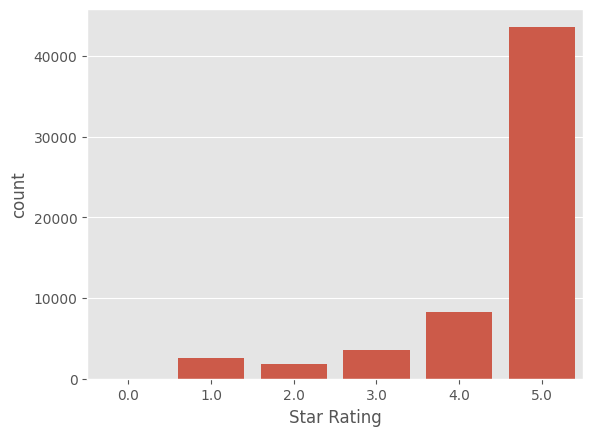

In [19]:
sns.countplot(data=df_sample,x='Star Rating')#, order=data.rating.value_counts().index)

<Axes: xlabel='Sentiment', ylabel='count'>

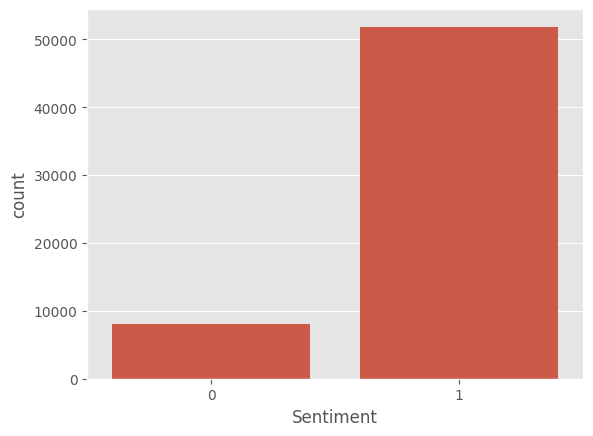

In [27]:
sns.countplot(data=df_sample,x='Sentiment')#, order=data.rating.value_counts().index)

In [28]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.4 MB/s eta 0:00:00


In [29]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from contractions import fix

# Download necessary resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [57]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Expand contractions (e.g., "don't" -> "do not")
    text = fix(text)

    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    # print(tokens)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # print(tokens)

    # Join tokens back into a single string
    return " ".join(tokens)

In [ ]:
# def count_vectorize_text(df, column_name):
#     vectorizer = CountVectorizer()
#     vectorized_data = vectorizer.fit_transform(df[column_name])
#     return vectorized_data, vectorizer.get_feature_names_out()

In [ ]:
df_sample["Processed_Reviews"] = df_sample["Review_combined"].apply(preprocess_text)

In [39]:
print(df_sample['Review_combined'].tail(1))

126840    It was a delight reading this book; simply fas...
Name: Review_combined, dtype: object


In [34]:
df_sample.sample(5)

,Helpful Votes (bin),Number of Records,Star Rating (bin),Customer Id,Helpful Votes,Overall Votes,Product Id,Review Body,Review Year,Review Headline,Star Rating,Sentiment,Review_combined,Processed_Reviews
8762,0,1,0.0,45889864.0,0.0,0.0,1441310533,Thank you,08/27/2015 0:00,Five Stars,5.0,1,Thank you Five Stars,thank five star
72801,0,1,0,29454845.0,0.0,1.0,470450428,"Well written, hard-to-put-down story of Don Fe...",08/29/2015 0:00,Felder pulls no punches!,5.0,1,"Well written, hard-to-put-down story of Don Fe...",well written hardtoputdown story felders life ...
115357,0,1,0,36202696.0,0.0,0.0,373788428,"You know, I thought at first - just what could...",08/29/2015 0:00,MAISEY DID GREAT ON THIS CONTINUATION OF COPPE...,5.0,1,"You know, I thought at first - just what could...",know thought first could write romance yes int...
74565,0,1,0,52438238.0,0.0,0.0,312626681,This is perhaps one of the most important soci...,08/30/2015 0:00,"Accessible, authentic, and thorough",4.0,1,This is perhaps one of the most important soci...,perhaps one important sociological book work w...
17389,0,1,0.0,11945795.0,0.0,0.0,1490345531,Love Millie Shott's illustrations.,08/27/2015 0:00,Five Stars,5.0,1,Love Millie Shott's illustrations. Five Stars,love millie shotts illustration five star


plotting word clouds

In [74]:
df_train['Review_combined'].isnull().sum()

27

In [ ]:
# df_sample['Clean_Review_len']=df_sample['Processed_Reviews'].apply(len)

In [40]:
from wordcloud import WordCloud

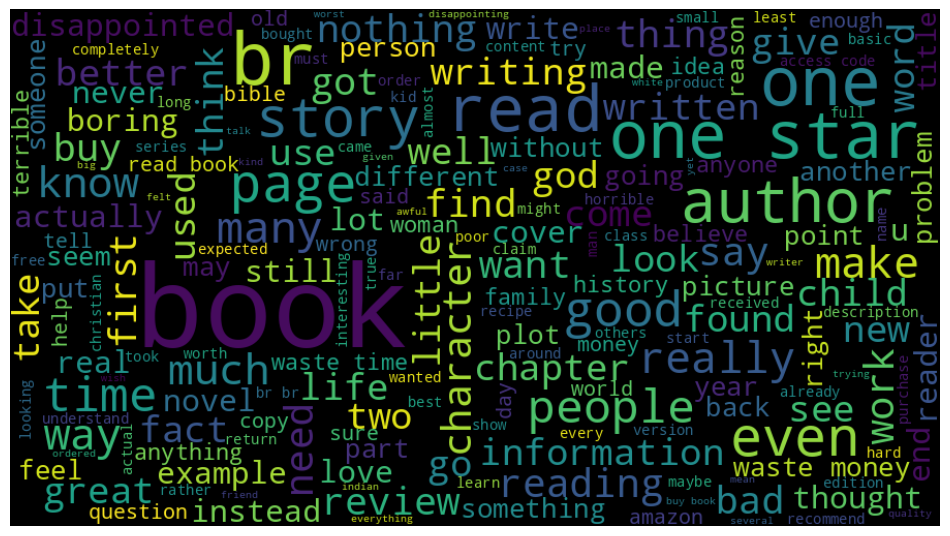

In [41]:
rating_1 = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Star Rating'] == 1]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_1)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

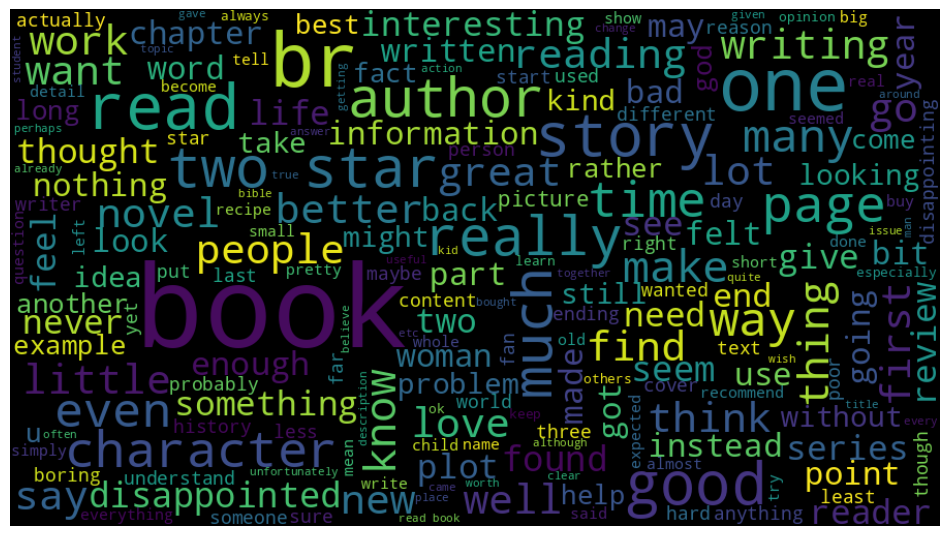

In [42]:
rating_2 = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Star Rating'] == 2]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_2)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

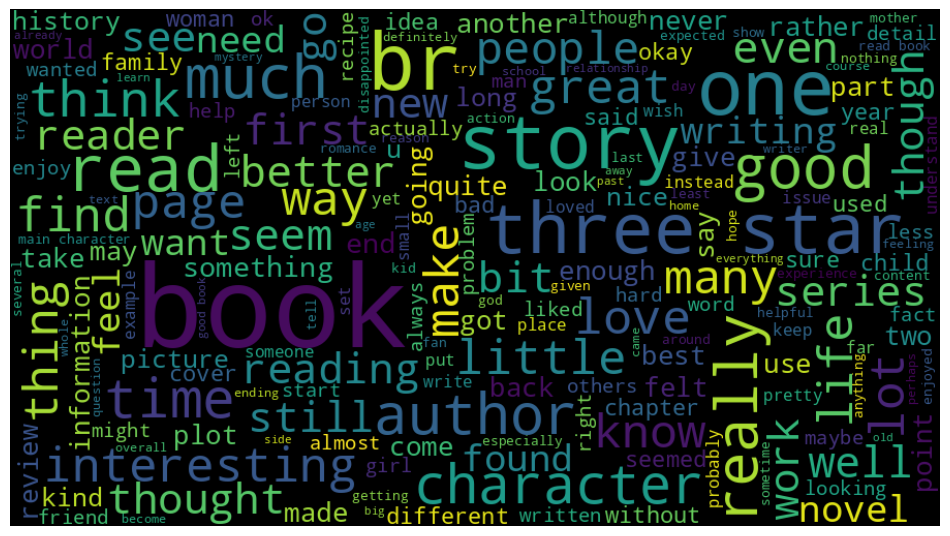

In [43]:
rating_3 = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Star Rating'] == 3]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_3)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

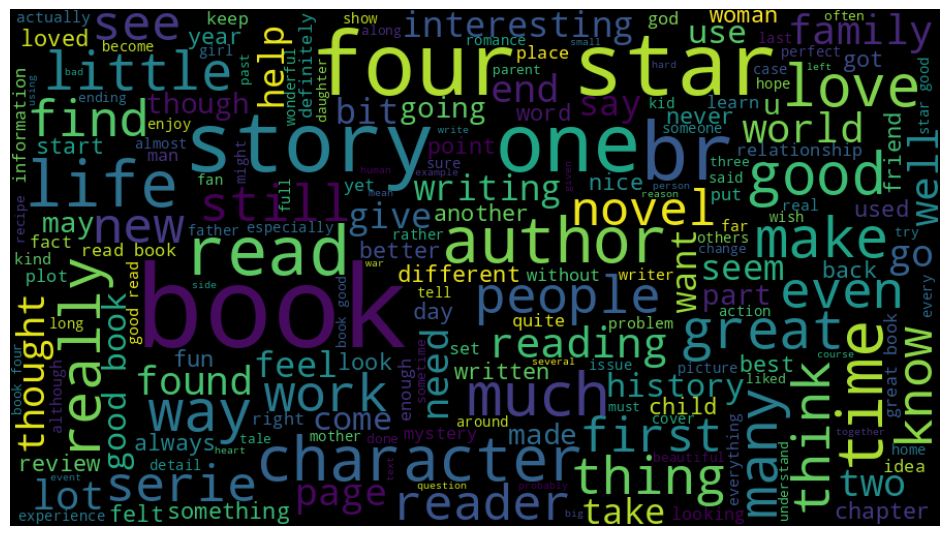

In [44]:
rating_4 = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Star Rating'] == 4]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_4)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

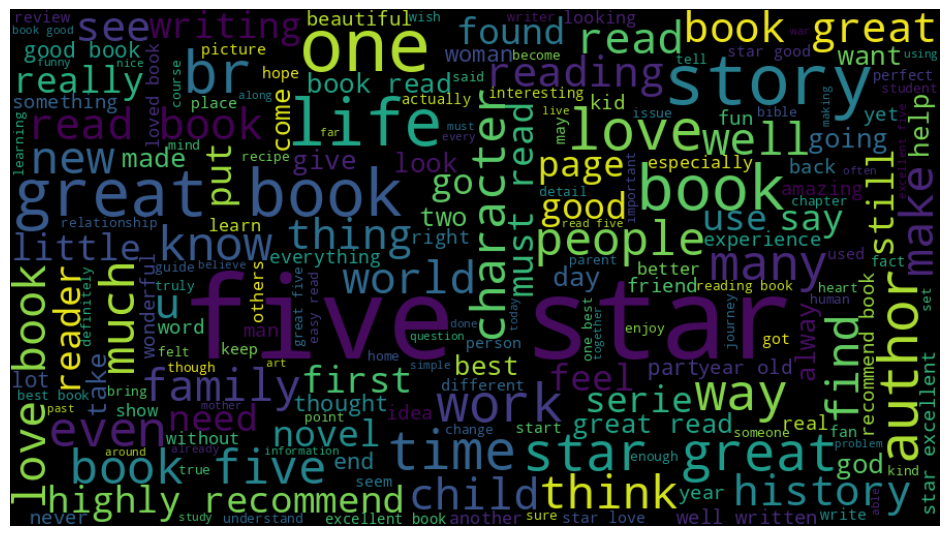

In [45]:
rating_5 = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Star Rating'] == 5]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(rating_5)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

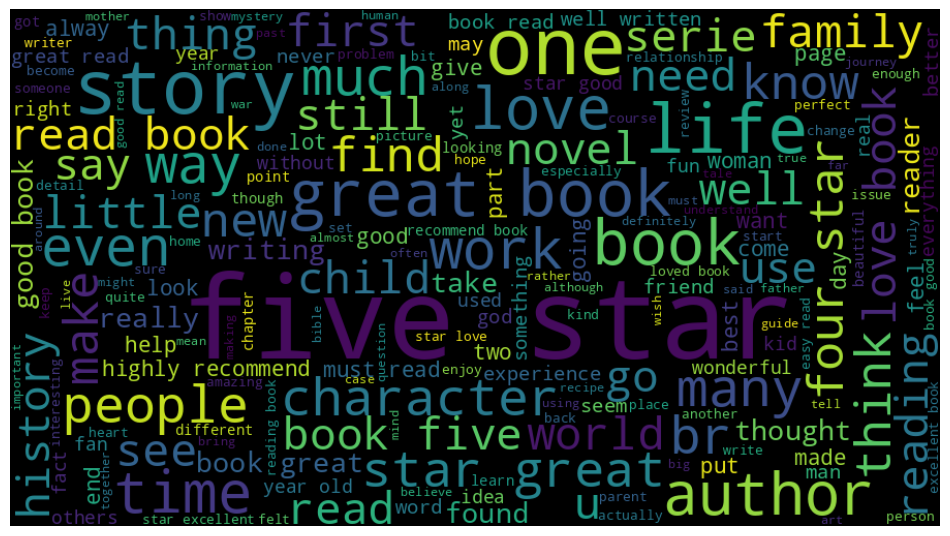

In [46]:
sentiment_p = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Sentiment'] == 1]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(sentiment_p)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

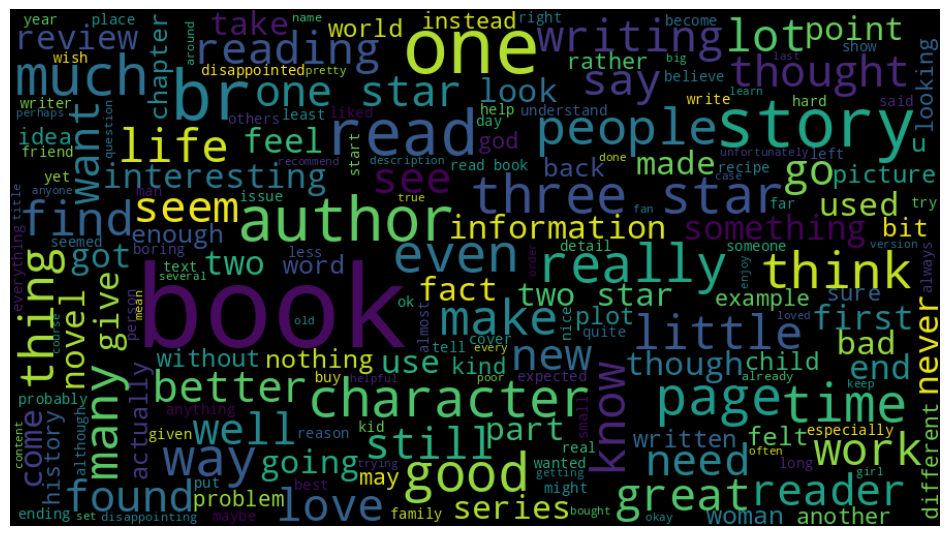

In [47]:
sentiment_n = ' '.join([text for text in df_sample['Processed_Reviews'][df_sample['Sentiment'] == 0]])
wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(sentiment_n)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [48]:
#determining TF-IDF Features of the words in the dataset.
TfId_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)
tfidf = TfId_vectorizer.fit_transform(df_sample['Processed_Reviews'] )

In [ ]:
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=25, max_features=5000, use_idf=True)
# tfidf = tfidf_vectorizer.fit_transform(df_sample["Processed_Reviews"])

In [49]:
print(tfidf)

  (0, 4858)	0.29807790186777877
  (0, 4110)	0.35182011143655884
  (0, 9926)	0.3000229889231015
  (0, 289)	0.45254008710635435
  (0, 895)	0.08289956825115277
  (0, 9809)	0.23528824550940966
  (0, 5830)	0.26441143721144705
  (0, 290)	0.31973895886338244
  (0, 1257)	0.35022303122327325
  (0, 9812)	0.36814449724624093
  (1, 1797)	0.20611584278968725
  (1, 614)	0.35767552757209037
  (1, 304)	0.397294650025481
  (1, 9131)	0.5127822654250175
  (1, 8769)	0.6393713988393923
  (2, 895)	0.21785687082345262
  (2, 4022)	0.3214519311737449
  (2, 3489)	0.30027983291504146
  (2, 8367)	0.26392216853157624
  (2, 4029)	0.5079936280474934
  (2, 1016)	0.5827501704542194
  (2, 3490)	0.30286773248484516
  (3, 8367)	0.22145980309829094
  (3, 5302)	0.43666824297940504
  (3, 4310)	0.5299014794147898
  :	:
  (59850, 8942)	0.11910328035825156
  (59850, 5827)	0.1531421097383236
  (59850, 7410)	0.1069232348063938
  (59850, 374)	0.12210836507162039
  (59850, 2411)	0.18701764620805736
  (59850, 7411)	0.17834377349908

In [ ]:
# df_sample.dropna(inplace=True)

In [52]:
X=tfidf #Tf_vector
y = df_sample['Sentiment'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score
# from sklearn.metrics import classification_
from sklearn.metrics import accuracy_score

In [53]:
model_log = LogisticRegression(multi_class='multinomial')
# model = LogisticRegression(random_state = 42)
model_log.fit(X_train, y_train)
accuracy = model_log.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_1:.2f} %")
y_pred = model_log.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of Logistic Regression 93.65 %
  
              precision    recall  f1-score   support

           0       0.87      0.64      0.74      1667
           1       0.94      0.99      0.96     10304

    accuracy                           0.94     11971
   macro avg       0.91      0.81      0.85     11971
weighted avg       0.93      0.94      0.93     11971



In [54]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)
accuracy = model_rf.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Random Forest {acc_1:.2f} %")
y_pred = model_rf.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 92.02 %
  
              precision    recall  f1-score   support

           0       0.93      0.46      0.62      1667
           1       0.92      0.99      0.96     10304

    accuracy                           0.92     11971
   macro avg       0.93      0.73      0.79     11971
weighted avg       0.92      0.92      0.91     11971



In [55]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc4=acc* 100
print(f"Accuracy of Multinomial Naive Bayes {acc4:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Multinomial Naive Bayes 92.02 %
  
              precision    recall  f1-score   support

           0       0.87      0.50      0.64      1667
           1       0.92      0.99      0.96     10304

    accuracy                           0.92     11971
   macro avg       0.90      0.75      0.80     11971
weighted avg       0.92      0.92      0.91     11971



# Predict sentiment of a Review

In [71]:
# prompt: # i want to give a custom review and make a prediction using random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# ... (Your existing code) ...

# Function to predict sentiment based on custom review
def predict_sentiment(review):
  """
  Predicts the sentiment of a given review using the trained Random Forest model.

  Args:
    review: The custom review text.

  Returns:
    The predicted sentiment (0 for negative, 1 for positive).
  """
  processed_review = preprocess_text(review)
  tfidf_review = TfId_vectorizer.transform([processed_review])
  prediction = model_rf.predict(tfidf_review)[0]
  return prediction

# Example usage:
custom_review = "\"This product is bad.\"  ##"
predicted_sentiment = predict_sentiment(custom_review)

if predicted_sentiment == 1:
  print("The predicted sentiment for your review is: Positive")
else:
  print("The predicted sentiment for your review is: Negative")



The predicted sentiment for your review is: Negative
